In [ ]:
#Importando as bibliotecas

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sf

In [ ]:
HIGH-PASS WINDOWED-SINC FILTER

In [ ]:
#Declarando as variaveis que serão utilizadas
#Iniciando as listas com todas as posições = 0

In [10]:
X = np.zeros(4999)
Y = np.zeros(4999)
H = np.zeros(100)

Fs = 8000 #Frequencia
FC = (1000/8000) #Frequencia de corte
tam = 100 #Tamanho do filtro
#tam = 32

In [ ]:
#Laço de repetição ára gerar a lista de coeficientes

In [12]:
#Gera os coeficientes
for i in range(len(H)):
    if(i-(tam/2) == 0):
        H[i] = 2* np.pi * FC
    if(i - tam/2) != 0:
        H[i] = np.sin(2 * np.pi * FC * (i-tam/2)) / (i - tam/2)
    H[i] = H[i]*(0.54-0.46*np.cos(2*np.pi*(i/tam)))

In [ ]:
# Em primeiro momento realiza a soma de todos os coeficientes
# Após isso ele divide os valores de H pelo valor da soma total
# Realiza a convolução

In [13]:
SUM = 0
#Soma todos os coeficientes
for i in range(len(H)):
    SUM = SUM + H[i] 

#Divide os coefiecientes pela soma de todos eles
for i in range(len(H)):
    H[i] = H[i] / SUM

for j in range(100, 4999): 
    Y[j] = 0
    for i in range(len(H)):
        Y[j] = Y[j] + X[j-i] * H[i]

In [ ]:
#Multiplica os valores de H por -1, assim invertendo o resultado
#Se acaso tam/2 for igual ao i, adiciona + 1 ao valor de H[i]

In [14]:
for i in range(tam):
    H[i] = H[i] * -1
    if( i == (tam/2)):
        H[i] +=1

        print(H)

[-5.09311611e-04 -3.71657070e-04  8.15008626e-19  4.22145861e-04
  6.53605583e-04  5.12766062e-04 -3.98090808e-18 -6.47931451e-04
 -1.03756270e-03 -8.32319683e-04  1.63584235e-18  1.07097048e-03
  1.71452409e-03  1.36942560e-03 -2.40510008e-18 -1.73392656e-03
 -2.74803269e-03 -2.17169380e-03  3.35391101e-18  2.69132283e-03
  4.22147367e-03  3.30335254e-03 -4.42265787e-18 -4.02109335e-03
 -6.25763215e-03 -4.86185887e-03  5.54418737e-18  5.84884448e-03
  9.06047132e-03  7.01408191e-03 -6.64802967e-18 -8.40325979e-03
 -1.30132384e-02 -1.00839440e-02  7.66482631e-18  1.21603676e-02
  1.89449148e-02  1.48018613e-02 -8.53068822e-18 -1.83022813e-02
 -2.90354672e-02 -2.32186485e-02  9.19121011e-18  3.07474130e-02
  5.13395221e-02  4.40036942e-02 -9.60488895e-18 -7.44173627e-02
 -1.58582568e-01 -2.24881747e-01  7.49992247e-01  2.24881747e-01
  1.58582568e-01  7.44173627e-02  9.60488895e-18 -4.40036942e-02
 -5.13395221e-02 -3.07474130e-02 -9.19121011e-18  2.32186485e-02
  2.90354672e-02  1.83022

In [15]:
#Grava os coeficientes em um arquivo existente
with open("coefSimuPA.dat", "w") as f:
    for s in H:
        f.write(str(s) +",\n")

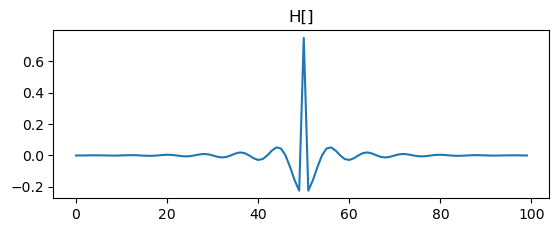

In [16]:
#Plotando o gráfico
plt.subplot(2, 1, 1)
plt.title("H[]")
plt.plot(H)

In [5]:
#Calcula a freqz e plota o grafico

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

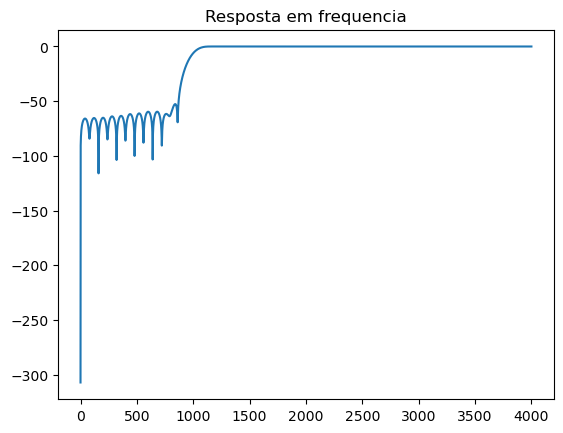

In [17]:
[w, H] = sf.freqz(H, 1,Fs)
plt.plot(w*Fs/(2*np.pi), 20*np.log10(abs(H)))
plt.title('Resposta em frequencia')
plt.grid